<a href="https://colab.research.google.com/github/mertkarahan955/CENG463-HW/blob/hw1-mert/463_HW_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task 1: Data Loading and Exploratory Data Analysis


**1. Download and Load the Dataset**



In [147]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt


In [148]:
#Task: Load the dataset
#load the data by the link
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data"
data = pd.read_csv(url, header=None)  # there is no column name in the dataset, thus we use "header=None"
#data.shape

In [149]:
#Data seperation problem checked
data = pd.read_csv(url, header=None, sep=",")
# define column names
columns = ["age", "sex", "cp", "trestbps", "chol", "fbs", "restecg",
           "thalach", "exang", "oldpeak", "slope", "ca", "thal", "num"]
data.columns = columns


In [150]:
#Task:display the first few rows using data.head()
data.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
5,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0
6,62.0,0.0,4.0,140.0,268.0,0.0,2.0,160.0,0.0,3.6,3.0,2.0,3.0,3
7,57.0,0.0,4.0,120.0,354.0,0.0,0.0,163.0,1.0,0.6,1.0,0.0,3.0,0
8,63.0,1.0,4.0,130.0,254.0,0.0,2.0,147.0,0.0,1.4,2.0,1.0,7.0,2
9,53.0,1.0,4.0,140.0,203.0,1.0,2.0,155.0,1.0,3.1,3.0,0.0,7.0,1


In [151]:
#replaces "?" with nan for finding null values in data
data = data.replace(["?", " "], np.nan)

In [152]:
#Task: Check for any missing values in the dataset.
data.isna().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [153]:
#replaced nan values with column's mean to avoid future porblems
data = data.apply(pd.to_numeric, errors='coerce')
data = data.fillna(data.mean())

In [154]:
data.dtypes #gerek olmayabilir konuşuruz

,0
age,float64
sex,float64
cp,float64
trestbps,float64
chol,float64
fbs,float64
restecg,float64
thalach,float64
exang,float64
oldpeak,float64


In [155]:
#checked null values again
data.isna().sum()

,0
age,0
sex,0
cp,0
trestbps,0
chol,0
fbs,0
restecg,0
thalach,0
exang,0
oldpeak,0


In [156]:
data.head(10) #datayı değiştirdim diye yaptım gerek olmayabilir

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0
5,56.0,1.0,2.0,120.0,236.0,0.0,0.0,178.0,0.0,0.8,1.0,0.0,3.0,0
6,62.0,0.0,4.0,140.0,268.0,0.0,2.0,160.0,0.0,3.6,3.0,2.0,3.0,3
7,57.0,0.0,4.0,120.0,354.0,0.0,0.0,163.0,1.0,0.6,1.0,0.0,3.0,0
8,63.0,1.0,4.0,130.0,254.0,0.0,2.0,147.0,0.0,1.4,2.0,1.0,7.0,2
9,53.0,1.0,4.0,140.0,203.0,1.0,2.0,155.0,1.0,3.1,3.0,0.0,7.0,1


In [157]:
data.describe()
#buna gerek yok ben alışkanlıktan yaptım

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.672241,4.734219,0.937294
std,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.931209,1.933272,1.228536
min,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
25%,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,3.000000,0.000000
50%,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000,3.000000,0.000000
75%,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000,7.000000,2.000000
max,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.000000,7.000000,4.000000


**2. Identify the Features and Target Variable**

In [158]:
#Task: Extract the features from the dataset
X = data.drop(columns=["num"])
#target column'ın adı num olarak geçiyor dataset tanımında ben o yüzden num olarak almıştım
#ama burda böyle güzel olmadı bilemedim.
#Task: Extract target variable from the dataset
Y = data["num"]

#Task: Print the names of all the feature columns and the target column.
print("Features (X):")
print(X.head())
print("\nTarget Variable (Y):")
print(Y.head())

Features (X):
    age  sex   cp  trestbps   chol  fbs  restecg  thalach  exang  oldpeak  \
0  63.0  1.0  1.0     145.0  233.0  1.0      2.0    150.0    0.0      2.3   
1  67.0  1.0  4.0     160.0  286.0  0.0      2.0    108.0    1.0      1.5   
2  67.0  1.0  4.0     120.0  229.0  0.0      2.0    129.0    1.0      2.6   
3  37.0  1.0  3.0     130.0  250.0  0.0      0.0    187.0    0.0      3.5   
4  41.0  0.0  2.0     130.0  204.0  0.0      2.0    172.0    0.0      1.4   

   slope   ca  thal  
0    3.0  0.0   6.0  
1    2.0  3.0   3.0  
2    2.0  2.0   7.0  
3    3.0  0.0   3.0  
4    1.0  0.0   3.0  

Target Variable (Y):
0    0
1    2
2    1
3    0
4    0
Name: num, dtype: int64


In [159]:
#buraya hoca bi şey istememiş ama normalde bi heatmap falan yapılsa iyi olurdu ekleyelim mi bilemedim

# Task 2: Correlation Analysis

**1. Define the Pearson Correlation Function**

In [187]:
#Task: Implement this formula in a Python functin named pearson_correlation.
# The function should take two arrays, x and y, and return the Pearson correlation coefficient.

def pearson_correlation(x, y):
    n = len(x)
    sum_x = sum(x)
    sum_y = sum(y)
    sum_x_sq = sum(x**2)
    sum_y_sq = sum(y**2)
    sum_xy = sum(x * y)

    # we calculated numerator and denominator seperately to avoid zero division error
    numerator = (n * sum_xy) - (sum_x * sum_y)
    denominator = ((n * sum_x_sq - sum_x**2) * (n * sum_y_sq - sum_y**2))**0.5
    # avoid zero division error
    if denominator == 0:
        return 0

    result = numerator / denominator
    return result




**2. Compute Correlations Between Each Feature and the Target**

In [188]:
#Task: Calculate correlations and store in a dictionary
correlations = {}
for column in X.columns:
    correlations[column] = pearson_correlation(X[column], Y)


**3. Filter Features Based on a Correlation Threshold**

In [189]:
#Task:Filter features based on a threshold value (given as 0.3)
threshold = 0.3
selected_features = {}
for feature, corr in correlations.items():
    if abs(corr) > threshold:
        selected_features[feature] = corr

#Task: Print the features with strong correlation
#We only want to consider features with an absolute correlation coefficient greater than 0.3.
print("\nFeatures with abs correlation > 0.3:")
for feature, corr in selected_features.items():
    print(f"{feature}: {corr:.2f}")


Features with abs correlation > 0.3:
ca: 0.46
thal: 0.52
oldpeak: 0.42
thalach: -0.42
cp: 0.41


**4. Find the Most Correlated Feature**

In [190]:
#Task: Find the most correlated feature
most_correlated_feature = max(selected_features, key=selected_features.get)
print(f"\nMost correlated feature: {most_correlated_feature} ({selected_features[most_correlated_feature]:.2f})")



Most correlated feature: thal (0.52)


In [191]:

#Task: Calculate correlations and store in a dictionary
correlations = {}
for column in X.columns:
    correlations[column] = pearson_correlation(X[column], Y)

#Task: Print all correlations
print("Correlations with target:")
for feature, corr in correlations.items():
    print(f"{feature}: {corr:.5f}")

#Task:Filter features based on a threshold value (given as 0.3)
threshold = 0.3
selected_features = {}
for feature, corr in correlations.items():
    if abs(corr) > threshold:
        selected_features[feature] = corr

#Task: Print the features with strong correlation
#We only want to consider features with an absolute correlation coefficient greater than 0.3.
print("\nFeatures with abs correlation > 0.3:")
for feature, corr in selected_features.items():
    print(f"{feature}: {corr:.2f}")

#Task: Find the most correlated feature
most_correlated_feature = max(selected_features, key=selected_features.get)
print(f"\nMost correlated feature: {most_correlated_feature} ({selected_features[most_correlated_feature]:.2f})")


Correlations with target:
ca: 0.45760
thal: 0.52393
oldpeak: 0.42451
thalach: -0.41717
cp: 0.41445

Features with abs correlation > 0.3:
ca: 0.46
thal: 0.52
oldpeak: 0.42
thalach: -0.42
cp: 0.41

Most correlated feature: thal (0.52)


# Task 3: Simple Linear Regression


In [165]:
def linear_regression(x, y):
    # Convert y to numeric, handling errors by coercing to NaN (error çıkıyordu gemini yaptı ???)
    X = pd.to_numeric(x, errors='coerce')
    Y = pd.to_numeric(y, errors='coerce')

    x_mean = X.mean()
    y_mean = Y.mean()

    # slope (b_1) calculations
    numerator = sum((X - x_mean) * (Y - y_mean))
    denominator = sum((X - x_mean) ** 2)

    # avoid zero division error (gereksiz ama zararı yok)
    if denominator == 0:
        return 0, 0
    b_1 = numerator / denominator

    #intercept (b_0) calculations
    b_0 = y_mean - (b_1 * x_mean)

    return b_0, b_1

In [166]:
#Task: Apply the function to the feature and target variables, obtaining the intercept and slope


b_0, b_1 = linear_regression(X['thal'], Y)  #error var diye gemini koydu buralar kontrol edilcek

#Task: Print the intercept and slope
print("Intercept (b0):", b_0)
print("Slope (b1):", b_1)


Intercept (b0): -0.5934023315864847
Slope (b1): 0.3233259749816042


In [167]:
#Task: using the coefficients predict y values for each input x
y_pred = b_0 + b_1 * X['thal']
print(y_pred)

#normalde mse calculate edilir ama hoca istememiş. sonra ekeriz belki

0      1.346554
1      0.376576
2      1.669879
3      0.376576
4      0.376576
         ...   
298    1.669879
299    1.669879
300    1.669879
301    0.376576
302    0.376576
Name: thal, Length: 303, dtype: float64


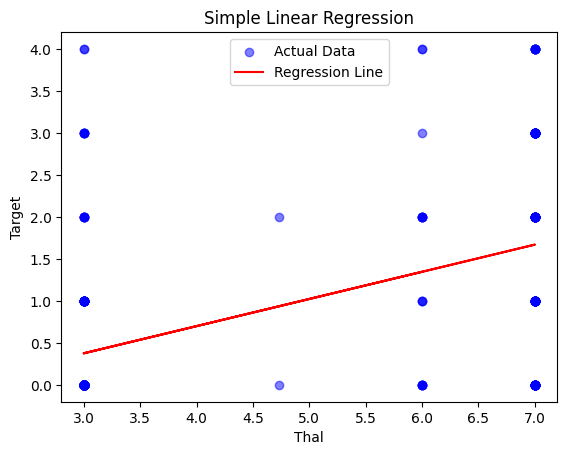

In [168]:
#Task: Visualize the results
plt.scatter(X['thal'], Y, color="blue", label="Actual Data", alpha=0.5)
plt.plot(X['thal'], y_pred, color="red", label="Regression Line")
plt.xlabel("Thal")
plt.ylabel("Target")
plt.title("Simple Linear Regression")
plt.legend()
plt.show()

# Task 4: Multiple Linear Regression

**1. Create the Multiple Linear Regression Function**

In [262]:

def multiple_linear_regression(X, Y):
    #chech X is a 2D array
    if X.ndim == 1:
        X = X.reshape(-1, 1)  #if X is 1D reshape it to 2D

    # Add a column of ones to X for the intercept
    X = np.hstack((np.ones((X.shape[0], 1)), X))

    # Transpose X for preparing it to Normal Equation
    X_transpose = np.transpose(X)
    # Apply the Normal Equation
    normal_coefficient_beta = np.linalg.inv(X_transpose.dot(X)).dot(X_transpose).dot(Y)

    return normal_coefficient_beta


**2. Select futures with High Correlation**

In [263]:



## get correalations dictionary from previous calculation
sorted_features = sorted(correlations.items(), key=lambda item: abs(item[1]), reverse=True)

# Select the top 5 most correlated features
top_5_features = dict(sorted_features[:5])


print("Top 5 most correlated features with the target:")
for feature, corr in top_5_features.items():
    print(f"{feature}: {corr:.2f}")



Top 5 most correlated features with the target:
thal: 0.52
ca: 0.46
oldpeak: 0.42
thalach: -0.42
cp: 0.41


**3. Calculate Regression Coefficients**

In [264]:
# get values from X with respect to top 5 feature keys [ca, thal, oldpeak, thalach, cp]
X_selected = X[top_5_features.keys()].values

beta = multiple_linear_regression(X_selected, Y)

print("Regression Coefficients for the selected features:", beta)

Regression Coefficients for the selected features: [ 0.07391285  0.08169728  0.13315192  0.06638903 -0.00318849  0.10022525]


**4. Generate Predictions**

In [265]:
def generate_predictions(X, beta):
    #chech X is a 2D array
    if X.ndim == 1:
        X = X.reshape(-1, 1)  #if X is 1D reshape it to 2D

    # add ones column for intercet
    X_b = np.hstack((np.ones((X.shape[0], 1)), X))

    #calculate predictions using  given function on document
    y_pred = X_b.dot(beta)

    return y_pred

In [266]:
#generate predictions using the selected features and calculated coefficients
predictions = generate_predictions(X_selected, beta)


print("Predicted target values:\n", predictions)

Predicted target values:
 [ 3.38743028e-01  8.74588054e-01  1.07429491e+00  2.55794375e-01
  6.39795133e-02  5.01515263e-03  7.15051606e-01  2.40015201e-01
  8.04083323e-01  7.58284835e-01  5.19656599e-01  1.17921926e-01
  5.84992016e-01  2.94635511e-01  4.63128671e-01  1.71105589e-01
  3.76966995e-01  2.89414091e-01  1.89758105e-01  1.40567784e-02
  7.95876042e-02 -3.09164463e-02  1.28797010e-01  8.73609502e-01
  1.05145163e+00  2.22121434e-01  7.12601192e-02  2.28353538e-01
  2.74257407e-01  8.15985002e-01  3.23572011e-01  8.95784869e-01
  1.15898983e-01  5.66542411e-01  7.54962998e-02  1.52354428e-01
  8.30048576e-01  7.80871975e-01  8.38632871e-01  2.49246311e-01
  1.14905173e+00  2.71412454e-01  2.95779224e-01  2.25309924e-01
  1.81050840e-01  7.19493182e-01  2.67329563e-01  8.11179557e-01
  3.05350619e-01  2.14696763e-01  1.16940750e-01  6.26861804e-01
  3.65218605e-01 -7.99809756e-02  8.13648794e-01  9.78357180e-01
  5.99731003e-01  5.42913366e-01  3.01376361e-01  2.46765227e-01

**5. Visualize the Results**

In [267]:

def plot_actual_vs_predicted(actual, predicted):
    plt.figure()
    plt.scatter(actual, predicted, alpha=0.5, label="Predicted values")
    # given x and y spots for drawing the line

    plt.plot([actual.min(), actual.max()], [actual.min(), actual.max()], color='red', label="Valid prediction line")

    plt.xlabel("Actual values")
    plt.ylabel("Predicted values")
    plt.title("Actual vs Predicted Values")
    plt.legend()
    plt.show()


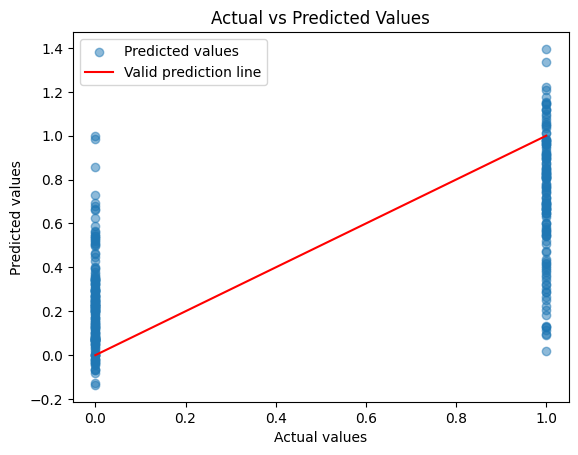

In [268]:

plot_actual_vs_predicted(Y, predictions)

**6. Calcute Mean Squared Error(MSE)**

In [269]:
def mean_squared_error(actual, predicted):
    mse = np.mean((actual - predicted) ** 2)
    return mse


**Calculate MSE for the multiple linear regression model**

In [270]:
mse_multiple = mean_squared_error(Y, predictions)
print("Mean Squared Error (MSE) for multiple linear regression:",mse_multiple)

Mean Squared Error (MSE) for multiple linear regression: 0.12765100972860824


**Calculate MSE for the simple linear regression model**

In [271]:
mse_simple = mean_squared_error(Y, y_pred)
print("Mean Squared Error (MSE) for simple linear regression:",mse_simple)


Mean Squared Error (MSE) for simple linear regression: 0.540898586827928


# Task 5: Logistic Regression

In [229]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

Task: Prepare Data for Logistic Regression

In [230]:
X_lg = data[top_5_features.keys()]
Y_lg = Y

# we should check for Y is binary or not. For that, we need to compare with
# threshold value

Y_lg = Y_lg.apply(lambda y: 1 if y > 0.9 else 0)



# on book, it gives an example for random_state as 42.
X_lg_train, X_lg_test, Y_lg_train, Y_lg_test = train_test_split(X_lg, Y_lg, random_state = 42)

# for clarify what we've done
print("Training features shape:", X_lg_train.shape)
print("Testing features shape:", X_lg_test.shape)
print("Training target shape:", Y_lg_train.shape)
print("Testing target shape:", Y_lg_test.shape)


Training features shape: (227, 5)
Testing features shape: (76, 5)
Training target shape: (227,)
Testing target shape: (76,)


Task: Train Logistic Regression Model

In [231]:
# get an instance of LogisticRegression class
# # setting C value to 100. In book it says "The default value of C=1 provides
# quite good performance, with 95% accuracy on both the training and the test
# set. But as training and test set performance are very close, it is likely
# that we are underfitting."
logistic_model = LogisticRegression(C=100, solver= 'lbfgs')

In [232]:
logistic_model.fit(X_lg_train, Y_lg_train)


## with this output, we can change C value inside LogisticRegression class.
# because in book it says, If scores are close to each other it might go to
# underfitting.
scr_train = logistic_model.score(X_lg_train, Y_lg_train)
scr_test = logistic_model.score(X_lg_test, Y_lg_test)
print("Score Train:", scr_train)
print("Score Test:", scr_test)



Score Train: 0.8281938325991189
Score Test: 0.8157894736842105


Task: Evaluate the Model

In [233]:
Y_lg_pred = logistic_model.predict(X_lg_test)

accuracy = accuracy_score(Y_lg_test, Y_lg_pred)

print("Accuracy:", accuracy)




Accuracy: 0.8157894736842105


Task: Visualize the Results

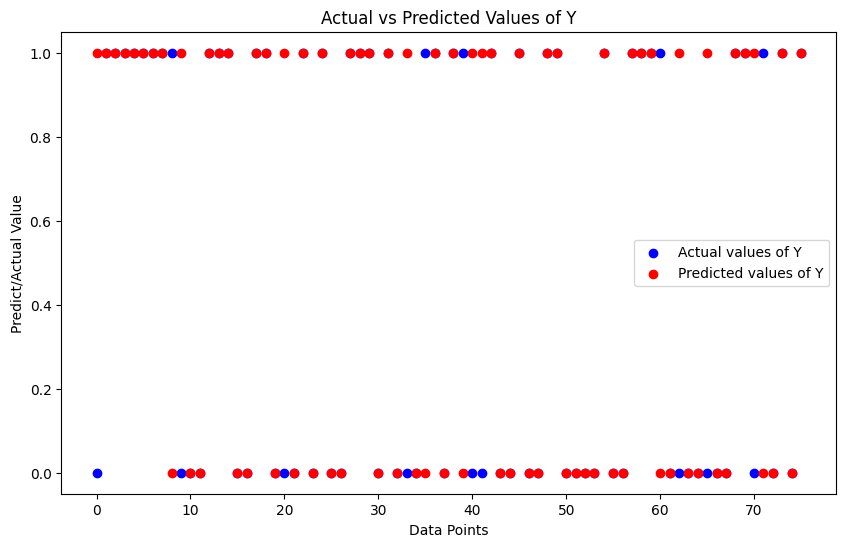

In [283]:
plt.figure(figsize=(10,6))
plt.scatter(range(len(Y_lg_test)), Y_lg_test, color = 'blue', label = 'Actual values of Y')
plt.scatter(range(len(Y_lg_test)), Y_lg_pred, color = 'red', label = 'Predicted values of Y')
plt.xlabel("Data Points")
plt.ylabel("Predict/Actual Value")
plt.title("Actual vs Predicted Values of Y")
plt.legend()

plt.show()


**Discussion**


# Task 6: Polynomial Regression

In [391]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

Task: Transform the Feature into Polynomial Features

In [392]:
# highest correlation feature
most_correlated_feature = 'thal'

# for fitting the data later, we are using 2D
X = data[[most_correlated_feature]].values

degree = 3
print(X[:5])
polynomial = PolynomialFeatures(degree=degree)
X_poly = polynomial.fit_transform(X)




[[6.]
 [3.]
 [7.]
 [3.]
 [3.]]


Task: Train a Polynomial Regression Model

In [393]:
Y = data["num"].values

X_poly_train, X_poly_test, Y_train, Y_test = train_test_split(X_poly, Y, random_state=42)

polynomial_model = LinearRegression()
polynomial_model.fit(X_poly_train, Y_train)

Y_pred = polynomial_model.predict(X_poly_test)



Task: Evalueate the Model

In [394]:
mse = mean_squared_error(Y_test, Y_pred)

print("Mean Squared Error (MSE):", mse )

Mean Squared Error (MSE): 1.077291162305035


Task: Visualize the Results

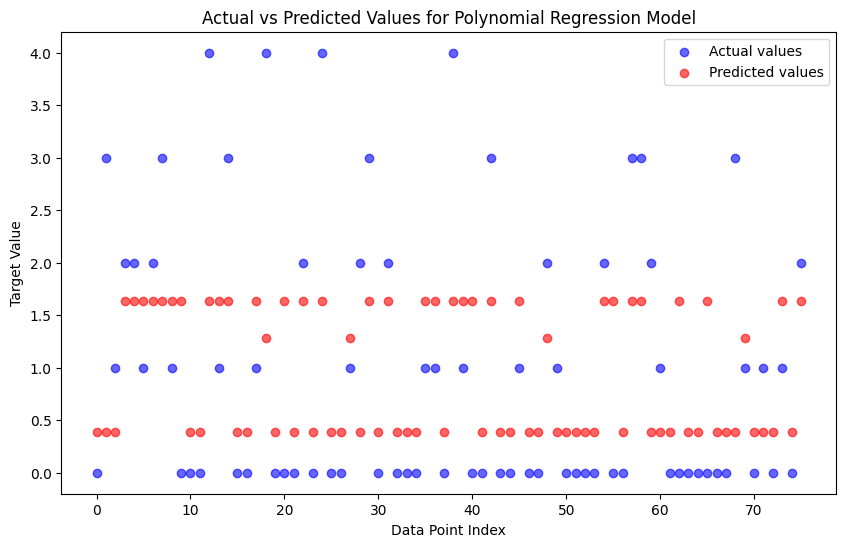

In [396]:
plt.figure(figsize=(10, 6))
plt.scatter(range(len(Y_test)), Y_test, color='blue', label='Actual values', alpha=0.6)
plt.scatter(range(len(Y_test)), Y_pred, color='red', label='Predicted values', alpha=0.6)
plt.xlabel("Data Point Index")
plt.ylabel("Target Value")
plt.title("Actual vs Predicted Values for Polynomial Regression Model")
plt.legend()
plt.show()


**Discussion**